# **Importing necessary libraries**

In [ ]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import numpy as np

# **Mount from google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Load the Weather dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Weather_Data.csv')
df.head(5)

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,20.7,20.9,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,17,20,92,84,1017.6,1017.4,8,8,Yes
1,22.4,24.8,19.5,25.6,6.0,3.4,2.7,W,41,W,E,9,13,83,73,1017.9,1016.4,7,7,Yes
2,23.5,23.0,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,17,2,88,86,1016.7,1015.6,7,8,Yes
3,21.4,20.9,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,22,20,83,90,1014.2,1011.8,8,8,Yes
4,22.5,25.5,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,11,6,88,74,1008.3,1004.8,8,8,Yes


In [ ]:
df.shape

(3271, 20)

# **Different types of wind direction analysis**

In [ ]:
# Number of wind directions
dir = df['WindGustDir'].nunique()

# Type of wind directions
types = df['WindGustDir'].unique()

print(f'There are: {dir} types of wind directions.')
print('The types of wind directions are:', list(types))

# Dictionary mapping wind direction abbreviations to full meanings
wind_direction_meanings = {
    'N': 'North',
    'NNE': 'North-Northeast',
    'NE': 'Northeast',
    'ENE': 'East-Northeast',
    'E': 'East',
    'ESE': 'East-Southeast',
    'SE': 'Southeast',
    'SSE': 'South-Southeast',
    'S': 'South',
    'SSW': 'South-Southwest',
    'SW': 'Southwest',
    'WSW': 'West-Southwest',
    'W': 'West',
    'WNW': 'West-Northwest',
    'NW': 'Northwest',
    'NNW': 'North-Northwest'
}

# Print the list of unique wind directions with their full meanings
print('Full meaning:')
for direction in types:
    full_meaning = wind_direction_meanings.get(direction, 'Unknown')
    print(f'{direction} = {full_meaning}')

There are: 16 types of wind directions.
The types of wind directions are: ['W', 'NNW', 'WNW', 'ENE', 'NNE', 'NW', 'SSE', 'NE', 'ESE', 'WSW', 'SE', 'SW', 'N', 'E', 'SSW', 'S']
Full meaning:
W = West
NNW = North-Northwest
WNW = West-Northwest
ENE = East-Northeast
NNE = North-Northeast
NW = Northwest
SSE = South-Southeast
NE = Northeast
ESE = East-Southeast
WSW = West-Southwest
SE = Southeast
SW = Southwest
N = North
E = East
SSW = South-Southwest
S = South


# **Number of classes in the label column and their percetages**

Number of classes: 2
Percentage of class 'No': 74.04%
Percentage of class 'Yes': 25.96%



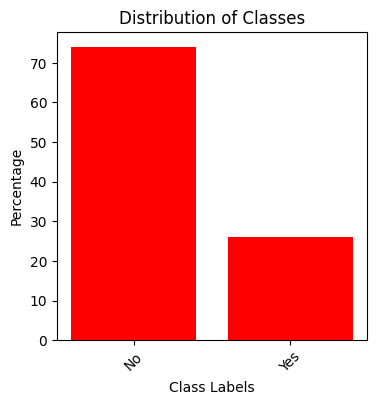

In [ ]:
# Calculate the total number of entries
total_entries = len(df)

# Get the number of distinct classes in the 'RainToday' column
distinct_classes = df['RainToday'].nunique()

# Print the result
print(f"Number of classes: {distinct_classes}")

# Get the count of each distinct class in the 'RainToday' column
class_counts = df['RainToday'].value_counts()

# Calculate the percentage of each class
class_percentages = (class_counts / total_entries) * 100

# Print the results
for label, percentage in class_percentages.items():
    print(f"Percentage of class '{label}': {percentage:.2f}%")

print()

# Plot the histogram
plt.figure(figsize=(4,4))
plt.bar(class_percentages.index, class_percentages, color='red')
plt.xlabel('Class Labels')
plt.ylabel('Percentage')
plt.title('Distribution of Classes')
plt.xticks(rotation=45)  # Rotate the x-axis labels if necessary

plt.show()

# **Pre-possessing:**


*   Convert text values into numeric values.
*   Missing value handler.




In [ ]:
# Convert text values into numeric values using LabelEncoder
label_encoder = LabelEncoder()
text_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
for column in text_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Handling missing values
imputer = SimpleImputer(strategy='mean')  # For numerical columns
df[df.select_dtypes(include=['float64', 'int64']).columns] = imputer.fit_transform(df.select_dtypes(include=['float64', 'int64']))

df.head(10)

,Temp9am,Temp3pm,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,RainToday
0,20.7,20.9,19.5,22.4,15.6,6.2,0.0,13.0,41.0,8.0,11.0,17.0,20.0,92.0,84.0,1017.6,1017.4,8.0,8.0,1.0
1,22.4,24.8,19.5,25.6,6.0,3.4,2.7,13.0,41.0,13.0,0.0,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,1.0
2,23.5,23.0,21.6,24.5,6.6,2.4,0.1,13.0,41.0,2.0,2.0,17.0,2.0,88.0,86.0,1016.7,1015.6,7.0,8.0,1.0
3,21.4,20.9,20.2,22.8,18.8,2.2,0.0,13.0,41.0,5.0,0.0,22.0,20.0,83.0,90.0,1014.2,1011.8,8.0,8.0,1.0
4,22.5,25.5,19.7,25.7,77.4,4.8,0.0,13.0,41.0,5.0,13.0,11.0,6.0,88.0,74.0,1008.3,1004.8,8.0,8.0,1.0
5,23.8,26.0,20.2,27.2,1.6,2.6,8.6,13.0,41.0,13.0,1.0,9.0,22.0,69.0,62.0,1002.7,998.6,6.0,6.0,1.0
6,21.7,22.3,18.6,26.3,6.2,5.2,5.2,13.0,41.0,13.0,8.0,15.0,15.0,75.0,80.0,999.0,1000.3,4.0,7.0,1.0
7,18.9,21.1,17.2,22.3,27.6,5.8,2.1,13.0,41.0,8.0,9.0,7.0,15.0,77.0,61.0,1008.3,1007.4,7.0,8.0,1.0
8,17.1,16.5,16.4,20.8,12.6,4.8,3.0,13.0,41.0,11.0,13.0,19.0,9.0,92.0,91.0,1006.4,1007.6,7.0,7.0,1.0
9,17.2,23.3,14.6,24.2,8.8,4.4,10.1,13.0,41.0,13.0,10.0,11.0,20.0,80.0,53.0,1014.0,1013.4,4.0,2.0,0.0


# **Splitting dataset into test and train sets only for machine learning regression models**

In [ ]:
# Splitting data into training and testing sets
X = df.drop('RainToday', axis=1)  # Assuming 'RainToday' is the target variable
y = df['RainToday']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Apply Linear Regression, Support Vector Regression and Random Forest Regression models.**
Results:


*   Mean Absolute Error (MAE).
*   Mean Squared Error (MSE).
*   R-squared (R2).


In [ ]:
# Apply the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating regression metrics
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Linear Regression results: ")
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'Mean Squared Error (MSE): {lr_mse}')
print(f'R-squared (R2): {lr_r2}')

print()

# Apply the Support Vector Regression model
model = SVR()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating regression metrics
svr_mae = mean_absolute_error(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Support Vector Regression results: ")
print(f'Mean Absolute Error (MAE): {svr_mae}')
print(f'Mean Squared Error (MSE): {svr_mse}')
print(f'R-squared (R2): {svr_r2}')

print()

# Apply the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Calculating regression metrics
rf_mae = mean_absolute_error(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Random Forest Regression results: ")
print(f'Mean Absolute Error (MAE): {rf_mae}')
print(f'Mean Squared Error (MSE): {rf_mse}')
print(f'R-squared (R2): {rf_r2}')


Linear Regression results: 
Mean Absolute Error (MAE): 0.2711803865824334
Mean Squared Error (MSE): 0.13350527352200772
R-squared (R2): 0.32776512871720387

Support Vector Regression results: 
Mean Absolute Error (MAE): 0.2803199267466111
Mean Squared Error (MSE): 0.18719821276014503
R-squared (R2): 0.057406773984540305

Random Forest Regression results: 
Mean Absolute Error (MAE): 0.2509160305343512
Mean Squared Error (MSE): 0.13724381679389314
R-squared (R2): 0.3089405603023333


# **Building LSTM Regression model & printing results**
Long Short Term Memory

In [ ]:
# Import necessary libraries for LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Normalize the data
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

# Define the features and target
X = scaled_df[:, :-1]  # Assuming 'RainToday' is the last column and is the target variable
y = scaled_df[:, -1]

# Reshape X to 3D array for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Rescale y_test and y_pred back to original scale
y_test = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], X.shape[2])), y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], X.shape[2])), y_pred), axis=1))[:, -1]

# Calculate regression metrics
lstm_mae = mean_absolute_error(y_test, y_pred)
lstm_mse = mean_squared_error(y_test, y_pred)
lstm_r2 = r2_score(y_test, y_pred)

# Print the metrics
print("LSTM Regression results: ")
print(f'Mean Absolute Error (MAE): {lstm_mae}')
print(f'Mean Squared Error (MSE): {lstm_mse}')
print(f'R-squared (R2): {lstm_r2}')


Epoch 1/100
66/66 [==============================] - 6s 14ms/step - loss: 0.1856 - val_loss: 0.1646
Epoch 2/100
66/66 [==============================] - 1s 10ms/step - loss: 0.1407 - val_loss: 0.1354
Epoch 3/100
66/66 [==============================] - 1s 9ms/step - loss: 0.1279 - val_loss: 0.1302
Epoch 4/100
66/66 [==============================] - 0s 5ms/step - loss: 0.1239 - val_loss: 0.1333
Epoch 5/100
66/66 [==============================] - 1s 8ms/step - loss: 0.1224 - val_loss: 0.1264
Epoch 6/100
66/66 [==============================] - 1s 9ms/step - loss: 0.1197 - val_loss: 0.1236
Epoch 7/100
66/66 [==============================] - 1s 10ms/step - loss: 0.1202 - val_loss: 0.1257
Epoch 8/100
66/66 [==============================] - 1s 7ms/step - loss: 0.1195 - val_loss: 0.1236
Epoch 9/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1182 - val_loss: 0.1207
Epoch 10/100
66/66 [==============================] - 0s 3ms/step - loss: 0.1173 - val_loss: 0.1239
Epoch 

# **Building CNN Regression model & printing results**
Convolutional Neural Network

In [ ]:
# Import necessary libraries for CNN
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the features and target
X = scaled_df[:, :-1]  # Assuming 'RainToday' is the last column and is the target variable
y = scaled_df[:, -1]

# Reshape X to 3D array for CNN [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the CNN model
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Rescale y_test and y_pred back to original scale
y_test_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1), y_test.reshape(-1, 1)), axis=1))[:, -1]
y_pred_rescaled = scaler.inverse_transform(np.concatenate((X_test.reshape(X_test.shape[0], -1), y_pred), axis=1))[:, -1]

# Calculate regression metrics
cnn_mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
cnn_mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
cnn_r2 = r2_score(y_test_rescaled, y_pred_rescaled)

# Print the metrics
print("CNN Regression results: ")
print(f'Mean Absolute Error (MAE): {cnn_mae}')
print(f'Mean Squared Error (MSE): {cnn_mse}')
print(f'R-squared (R2): {cnn_r2}')


Epoch 1/100
66/66 [==============================] - 1s 7ms/step - loss: 0.1645 - val_loss: 0.1368
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1338 - val_loss: 0.1258
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1264 - val_loss: 0.1227
Epoch 4/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1242 - val_loss: 0.1212
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1235 - val_loss: 0.1218
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1238 - val_loss: 0.1194
Epoch 7/100
66/66 [==============================] - 0s 3ms/step - loss: 0.1204 - val_loss: 0.1243
Epoch 8/100
66/66 [==============================] - 0s 3ms/step - loss: 0.1221 - val_loss: 0.1203
Epoch 9/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1187 - val_loss: 0.1197
Epoch 10/100
66/66 [==============================] - 0s 4ms/step - loss: 0.1179 - val_loss: 0.1213
Epoch 11/

# **Plotting all the result of different models.**

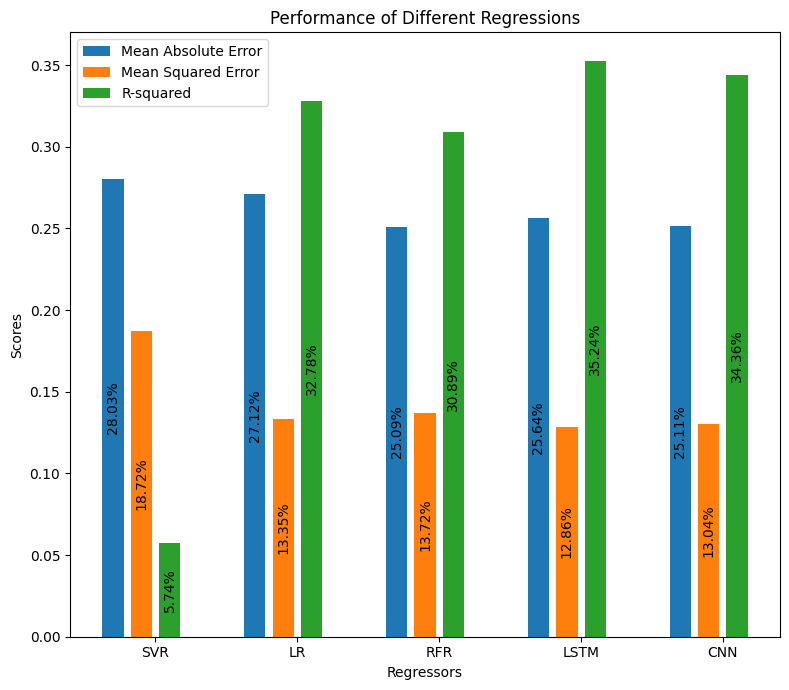

In [ ]:
# Data
classifiers = ['SVR', 'LR', 'RFR', 'LSTM', 'CNN']
mae = [svr_mae, lr_mae, rf_mae, lstm_mae, cnn_mae]
mse = [svr_mse, lr_mse, rf_mse, lstm_mse, cnn_mse]
r2 = [svr_r2, lr_r2, rf_r2, lstm_r2, cnn_r2]

# Plotting
bar_width = 0.15
gap = 0.05  # gap between different metrics
index = np.arange(len(classifiers))

plt.figure(figsize=(8, 7))

bars1 = plt.bar(index - 1.5 * (bar_width + gap), mae, bar_width, label='Mean Absolute Error')
bars2 = plt.bar(index - 0.5 * (bar_width + gap), mse, bar_width, label='Mean Squared Error')
bars3 = plt.bar(index + 0.5 * (bar_width + gap), r2, bar_width, label='R-squared')


# Adding text for percentages inside the bars
def add_percentage_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height / 2, f'{height:.2%}', ha='center', va='center', fontsize=10, color='black', rotation='vertical')

add_percentage_labels(bars1)
add_percentage_labels(bars2)
add_percentage_labels(bars3)

plt.xlabel('Regressors')
plt.ylabel('Scores')
plt.title('Performance of Different Regressions')
plt.xticks(index, classifiers)
plt.legend()

plt.tight_layout()
plt.show()

# *** CNN gives us better results.**
